# Linear Regression

In [1]:
# Importing libraries

import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv("//home//apoorv//Downloads//archive (3)//insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Handling Categorical values
# One hot Encoding
df2 = pd.get_dummies(df, drop_first= True, dtype = 'int32')
df2

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [7]:
df2.shape

(1338, 9)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   int32  
 5   smoker_yes        1338 non-null   int32  
 6   region_northwest  1338 non-null   int32  
 7   region_southeast  1338 non-null   int32  
 8   region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 68.1 KB


In [9]:
# split Data

In [10]:
X = df2.drop('charges', axis = 1)
y = df2['charges']
X.shape,y.shape

((1338, 8), (1338,))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Shape of X_train = ',X_train.shape)
print('Shape of X_test = ',X_test.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (1070, 8)
Shape of X_test =  (268, 8)
Shape of y_train =  (1070,)
Shape of y_test =  (268,)


In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Linear Regression - ML model training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.coef_

array([3595.43999401, 1969.23968492,  492.75838658, -121.05538036,
       9613.18531706, -169.6592747 , -457.46563642, -390.29113777])

In [15]:
lr.intercept_

13230.161574933647

In [16]:
# predict the insurance charges for one patient

lr.predict([X_test[0,:]])

array([4383.68089988])

In [21]:
# predict the insurance charges for all and storing them into  y_pred
y_pred= lr.predict(X_test) 

In [17]:
# Testing accuracy

print('Accuracy :', lr.score(X_test, y_test))

Accuracy : 0.7623311844057112


In [26]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('Root_Mean_Squared_Error :' ,rmse)

Root_Mean_Squared_Error : 5956.454717976426


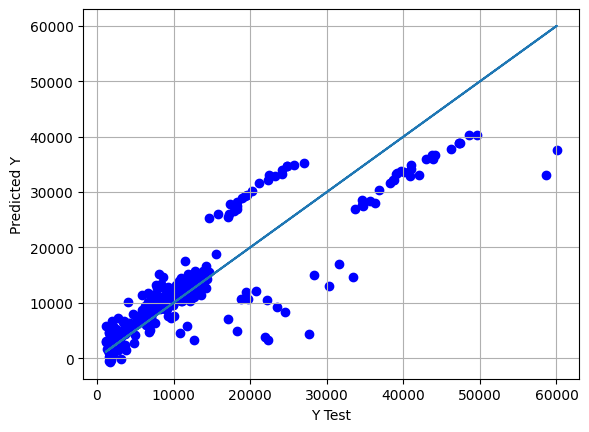

In [22]:
# Plot of Predicted Y and Y test

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.plot(y_test,y_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

In [23]:
y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64

In [24]:
y_pred

array([ 4383.68089988, 12885.03892192, 12589.21653212, 13286.22919217,
         544.72832757, 32117.58400779, 12919.04237221, 12318.62183013,
        3784.29145555, 29468.45725408, 11002.8139431 , 17539.69473777,
        8681.35471964,  8349.04325528,  3130.12725504, 10445.83896118,
        3863.74357865,  6944.62510786, 15009.63121084, 14441.59911874,
       12543.65768867, 32958.72553095,  9072.63608136,  8986.85860053,
        3022.85773294,  8164.97136102,  9556.07558002, 10743.20363927,
        7694.01743692,  4373.43771674, 14140.93557984,  5811.78545062,
       34631.91316718, 27009.11191231, 33348.14098668,  9532.96786929,
       30421.65017927, 26648.91186842, 15157.78333287, 33895.76121465,
        6303.38552088, 14059.15156303, 10713.4467824 , 15089.36171493,
        4187.95334069, 13106.4297513 ,  4336.19603407, 28607.05556216,
        7243.57117377, 14269.4643165 , 13282.36924936, 12329.61280721,
        1851.87215658,  8876.2837892 , 26089.18341811, 10125.8221046 ,
      